# Programming Exercise 1 part 2 - Multivariate Linear Regression


[Linear regression with one variable](#Linear-regression-with-one-variable)
  - [Feature normalization](#Question-1-:-Feature-normalization)
  - [Cost Computation](#Question-2-:-Cost-Computation)
  - [Gradient Descent](#Question-3-:-Gradient-Descent)
  - [Prediction](#Question-4-:-Predict-Price)
  - [Normal Equation](#Question-5-:-Normal-Equation)
  - [Use Scikit-learn](#Question-6-:-Use-Scikit-learn)

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d, Axes3D

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Load data : here the data is the price of a house as a function of area and number of rooms

In [2]:
data = np.loadtxt('data/ex1data2.txt', delimiter=',')

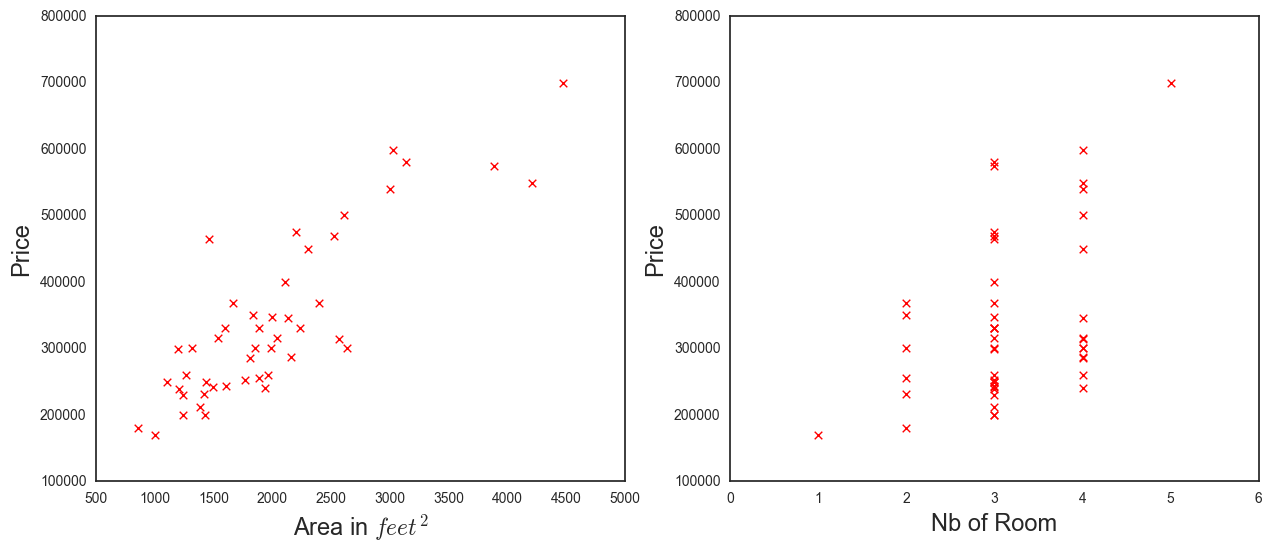

In [3]:

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(data[:,0:1], data[:,2], s=30, c='r', marker='x', linewidths=1)
ax2.scatter(data[:,1:2], data[:,2], s=30, c='r', marker='x', linewidths=1)

for ax in fig.axes:
    ax.set_ylabel('Price', fontsize=17)
fig.axes[0].set_xlabel('Area in $feet^2$', fontsize=17)
fig.axes[1].set_xlabel('Nb of Room', fontsize=17)


### Question 1 : Feature normalization
From now on, all calculus have to be vectorized. The algorithm you're writing should be working for any dataset size.

In [4]:
def featureNormalize(X):
    X_norm = X;
    mu = np.zeros(X.shape)
    sigma = np.zeros(X.shape)
    # your code here
    
    return X_norm, mu, sigma;

In [5]:
# X = np.c_[data[:,0:2]]
y = np.c_[data[:,2]]

X, mu, sigma = featureNormalize(data[:,0:2])
X = np.c_[np.ones(data.shape[0]),X]

### Question 2 : Cost Computation

$$ J(\theta) =  \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)} )^{2} $$

In [6]:
def computeCostMulti(X, y, theta):
    J = 0.0;
    # your code here. Code have to be vecorized and have to work with any dataset size
    return J;

In [7]:
# compute initial cost and init theta
theta = np.zeros(( X.shape[1], 1) )
print theta
J = computeCostMulti(X, y, theta);
print "Initial Error is :",  J
print "Initial Error Should around 65591548106"

[[ 0.]
 [ 0.]
 [ 0.]]
Initial Error is : 0.0
Initial Error Should around 65591548106


### Question 3 : Gradient Descent
Repeat until convergence :
$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \text{,  for j := 0...n} $$

In [8]:
def gradientDescentMulti(X, y, theta=np.array([[0],[0], [0]]), alpha=0.1, num_iters=50):
    J_hist = np.zeros(num_iters)
    
    m = y.size
    J_hist = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = 0;
        # your code here
    
    return theta, J_hist

##### Understanding learning rate and normalization :
When learning works fine then
- try to play with alpha and see the influence of changing it
- try to disable feature normalization and observe what happens

theta:
[[0]
 [0]
 [0]]


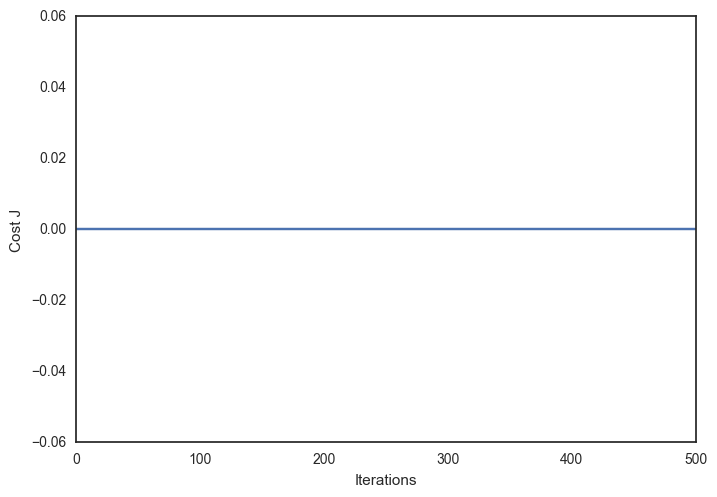

In [9]:
# call gradient descent
theta , Cost_J = gradientDescentMulti(X, y, alpha = 0.1, num_iters=500)
print 'theta:\n',theta

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

### Question 4 : Predict Price
Here you have to estimate the price of 1650 sq-ft house.
If everything is fine the estimated price should be : FIXME

In [10]:
# Estimate the price of a 1650 sq-ft, 3 br house
# hint : do not forget to normalize the input vector
house = [1650, 3]
predprice = 0
# YOUR CODE HERE

print "Predicted Price is : ", predprice

Predicted Price is :  0


### Question 5 : Normal Equation

With the normal equation $\theta = (X^T X)^{-1}X^T y$

If everything is fine, then result should be similar to what we obtained previously.

In [11]:
def normalEq(X, y):
    temp1 = X.transpose().dot(X)
    temp2 = X.transpose().dot(y)
    
    theta_eq = np.linalg.pinv(temp1).dot(temp2)
    return theta_eq

In [12]:
# Call
theta_eq = normalEq(X, y)

print "theta_eq : \n", theta_eq
pred = theta_eq.transpose().dot(house)
print "Predicted Price is : ", pred[0]

print "Difference between two thetas is : \n", theta - theta_eq

theta_eq : 
[[ 89597.90954355]
 [   139.21067402]
 [ -8738.01911255]]


ValueError: shapes (1,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

### Question 6 : Use Scikit-learn (not in original coursera exercise)
Now you should use scikit-learn to do the linear regression.
If everything is fine, then result should be similar to what we obtained previously.

In [ ]:
# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1:3], y)

# keep this part
theta_sckit = np.c_[regr.intercept_, regr.coef_].transpose()

print "theta_sckit : \n", theta_sckit

